In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot  as plt
import numpy as np
from utils.utils import min_max_normalize

In [2]:
df_res = pd.read_excel("df_res.xlsx")

In [3]:
cols = [
    "idade_posse_norm",
    "tempo_atuacao_percent",
    "mesa_1_cum",
    "mesa_2_cum",
    "pos_lider_cum",
    "pos_comiss_pr_cum",
    "relatorias_ln_cum",
    "mand_dep_estadual",
    "mand_ver",
    "mand_sen",
    # "fid_municipais",
    # "fid_gerais",
]
df_res[cols].describe()

,idade_posse_norm,tempo_atuacao_percent,mesa_1_cum,mesa_2_cum,pos_lider_cum,pos_comiss_pr_cum,relatorias_ln_cum,mand_dep_estadual,mand_ver,mand_sen
count,6250.000000,6250.000000,6250.000000,6250.000000,6250.00000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,0.457951,0.878230,0.004640,0.021920,0.12624,0.254560,2.130083,0.611520,0.385280,0.025760
std,0.118103,0.273079,0.078864,0.184187,0.44964,0.600314,1.731171,1.063421,0.766794,0.192204
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385542,0.980000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.457831,1.000000,0.000000,0.000000,0.00000,0.000000,2.197225,0.000000,0.000000,0.000000
75%,0.542169,1.000000,0.000000,0.000000,0.00000,0.000000,3.548101,1.000000,1.000000,0.000000
max,1.000000,1.060000,2.000000,5.000000,5.00000,5.000000,9.144414,7.000000,6.000000,3.000000


In [4]:
final_loadings = []

for legislatura in df_res['idLegislatura'].unique():
    if legislatura < 52:
        continue
# legislatura = 56
    df = df_res[df_res['idLegislatura'] == legislatura].loc[:, cols]

    for c in df.columns:
        df[f'{c}_norm'] = min_max_normalize(df[c])

    df = df[df.columns[len(cols):]]
    

    # Definir o número de fatores como uma variável
    n_factors = 3

    # Análise Fatorial
    fa = FactorAnalyzer(n_factors=n_factors, rotation=None)
    fa.fit(df)


    for i, c in enumerate(df.columns):
        max_loading_exp = np.max([np.exp(l) for l in fa.loadings_[i]])
        final_loadings.append(
            {"legis": legislatura, "column": c, "max_loading_exp": max_loading_exp}
        )

In [6]:
df_res = pd.DataFrame(final_loadings).sort_values(['column', 'legis'], ascending=False)

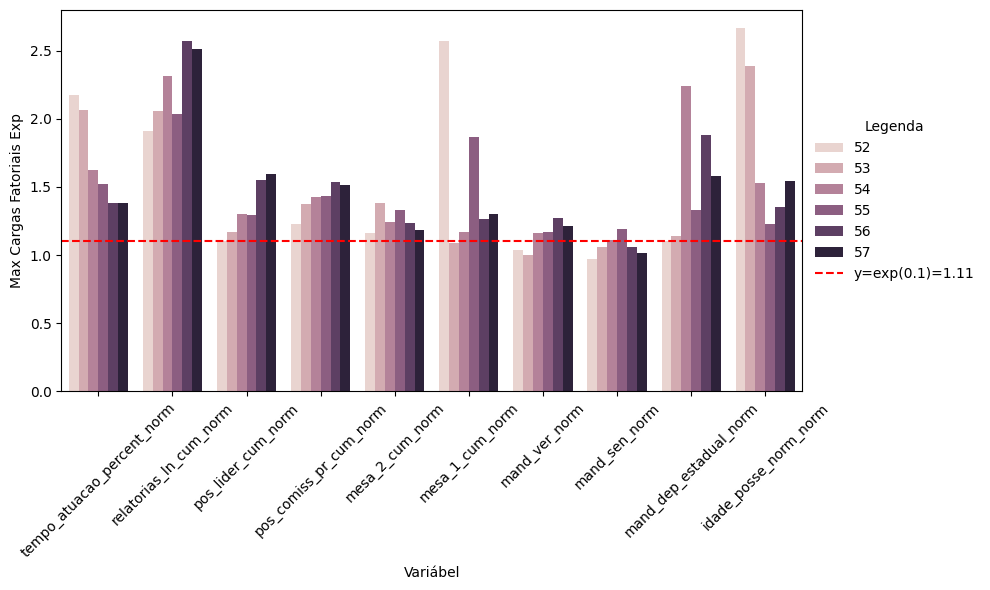

In [24]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df_res, x='column', y='max_loading_exp', hue='legis')

plt.axhline(y=np.exp(0.1), color='red', linestyle='--', label=f'y=exp(0.1)={np.exp(0.1):.2f}')

# Add labels and title
plt.xlabel('Variábel')
plt.ylabel('Max Cargas Fatoriais Exp')
# plt.title('Barplot of Variables Colored by Legis')

plt.legend(title='Legenda', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [17]:
final_loadings = []

cols_total = cols.copy()
cols_total += [
    "fid_municipais",
    "fid_gerais",
]

df = df_res[df_res["idLegislatura"] >= 51].loc[:, cols_total]

for c in df.columns:
    df[f"{c}_norm"] = min_max_normalize(df[c])

df = df[df.columns[len(cols_total) :]]


# Definir o número de fatores como uma variável
n_factors = 3

# Análise Fatorial
fa = FactorAnalyzer(n_factors=n_factors, rotation=None)
fa.fit(df)


for i, c in enumerate(df.columns):
    max_loading_exp = np.max([np.exp(l) for l in fa.loadings_[i]])
    final_loadings.append(
        {"legis": legislatura, "column": c, "max_loading_exp": max_loading_exp}
    )

In [18]:
pd.DataFrame(final_loadings).sort_values(['column', 'max_loading_exp'], ascending=False)

,legis,column,max_loading_exp
1,50,tempo_atuacao_percent_norm,1.638830
6,50,relatorias_ln_cum_norm,1.860444
4,50,pos_lider_cum_norm,1.370228
5,50,pos_comiss_pr_cum_norm,1.485172
3,50,mesa_2_cum_norm,1.237107
2,50,mesa_1_cum_norm,1.249562
8,50,mand_ver_norm,1.044206
9,50,mand_sen_norm,1.174598
7,50,mand_dep_estadual_norm,1.261093
0,50,idade_posse_norm_norm,1.636800


In [8]:
np.exp(.1)

1.1051709180756477